___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 


------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pandas.read_csv('./Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
df.isna().sum(axis=0)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

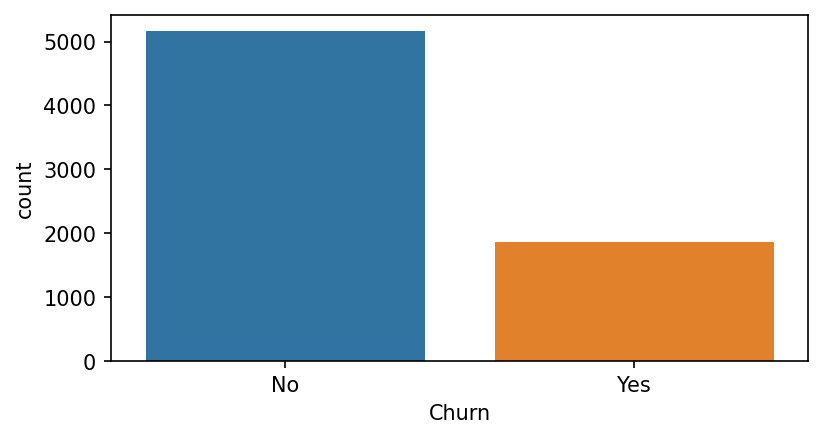

In [7]:
plt.figure(figsize=(6,3), dpi=150)
sns.countplot(data=df, x="Churn")
plt.show()

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

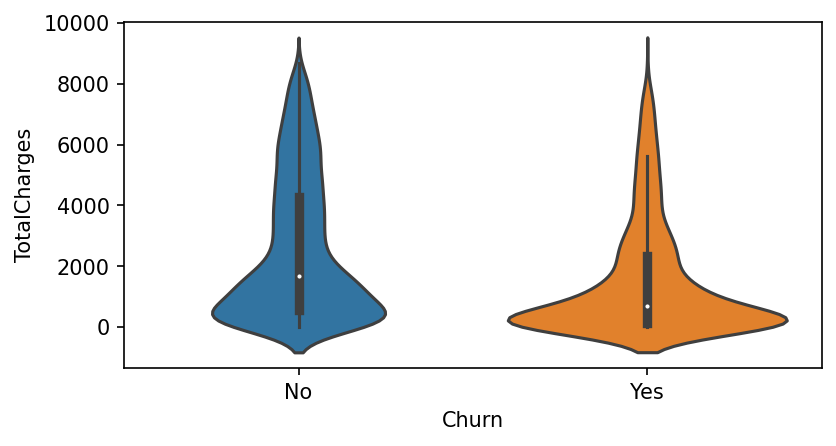

In [8]:
plt.figure(figsize=(6,3), dpi=150)
sns.violinplot(data=df, x="Churn", y="TotalCharges")
plt.show()

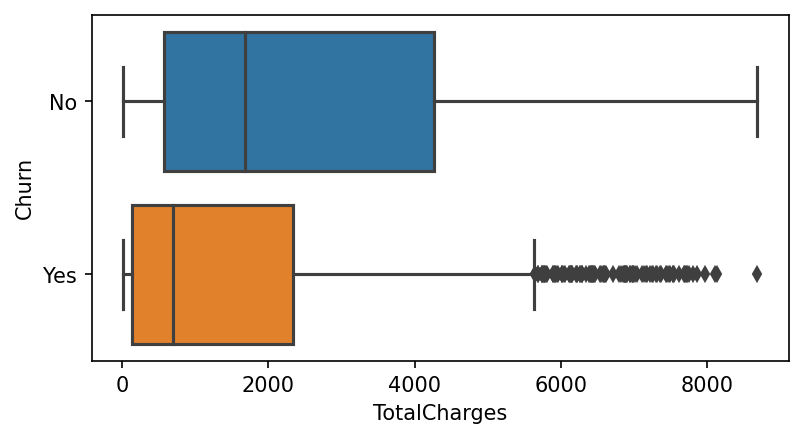

In [9]:
plt.figure(figsize=(6,3), dpi=150)
sns.boxplot(data=df, y="Churn", x="TotalCharges")
plt.show()

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

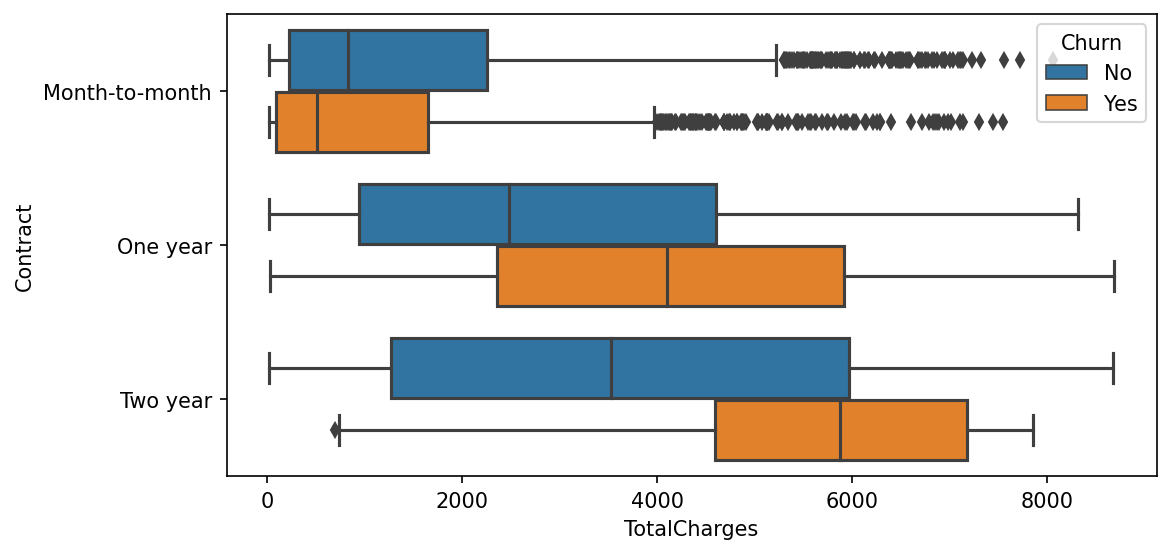

In [10]:
plt.figure(figsize=(8,4), dpi=150)
sns.boxplot(data=df, y="Contract", x="TotalCharges", hue="Churn")
plt.show()

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [11]:
df["Partner"].dtype == "O"

True

In [12]:
for col in df.columns:
    if df[col].dtype == "O":
        print(f"{col}:", df[col].unique())

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


### Dealing with categorical features

In [13]:
df二 = df.drop(columns=["customerID"])
df二["MultipleLines"] = df二["MultipleLines"].str.replace(pat="No phone service", repl="No")
for col in df二.columns:
    if df二[col].dtype == "O":
        df二[col] = df二[col].str.replace(pat="No internet service", repl="No")

df二

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
df三 = pandas.get_dummies(data=df二, drop_first=True)
df三.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   gender_Male                            7032 non-null   uint8  
 5   Partner_Yes                            7032 non-null   uint8  
 6   Dependents_Yes                         7032 non-null   uint8  
 7   PhoneService_Yes                       7032 non-null   uint8  
 8   MultipleLines_Yes                      7032 non-null   uint8  
 9   InternetService_Fiber optic            7032 non-null   uint8  
 10  InternetService_No                     7032 non-null   uint8  
 11  Onli

In [15]:
df三

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,0
7028,0,72,103.20,7362.90,0,1,1,1,1,1,...,0,1,1,1,0,1,1,0,0,0
7029,0,11,29.60,346.45,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7030,1,4,74.40,306.60,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,1


In [16]:
helper_series = df三.corr()["Churn_Yes"].sort_values(ascending=True)
helper_series

tenure                                  -0.354049
Contract_Two year                       -0.301552
InternetService_No                      -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
gender_Male                             -0.008545
PhoneService_Yes                         0.011691
MultipleLines_Yes                        0.040033
StreamingMovies_Yes                      0.060860
StreamingTV_Yes                          0.063254
SeniorCitizen                            0.150541
PaperlessBilling_Yes                     0.191454


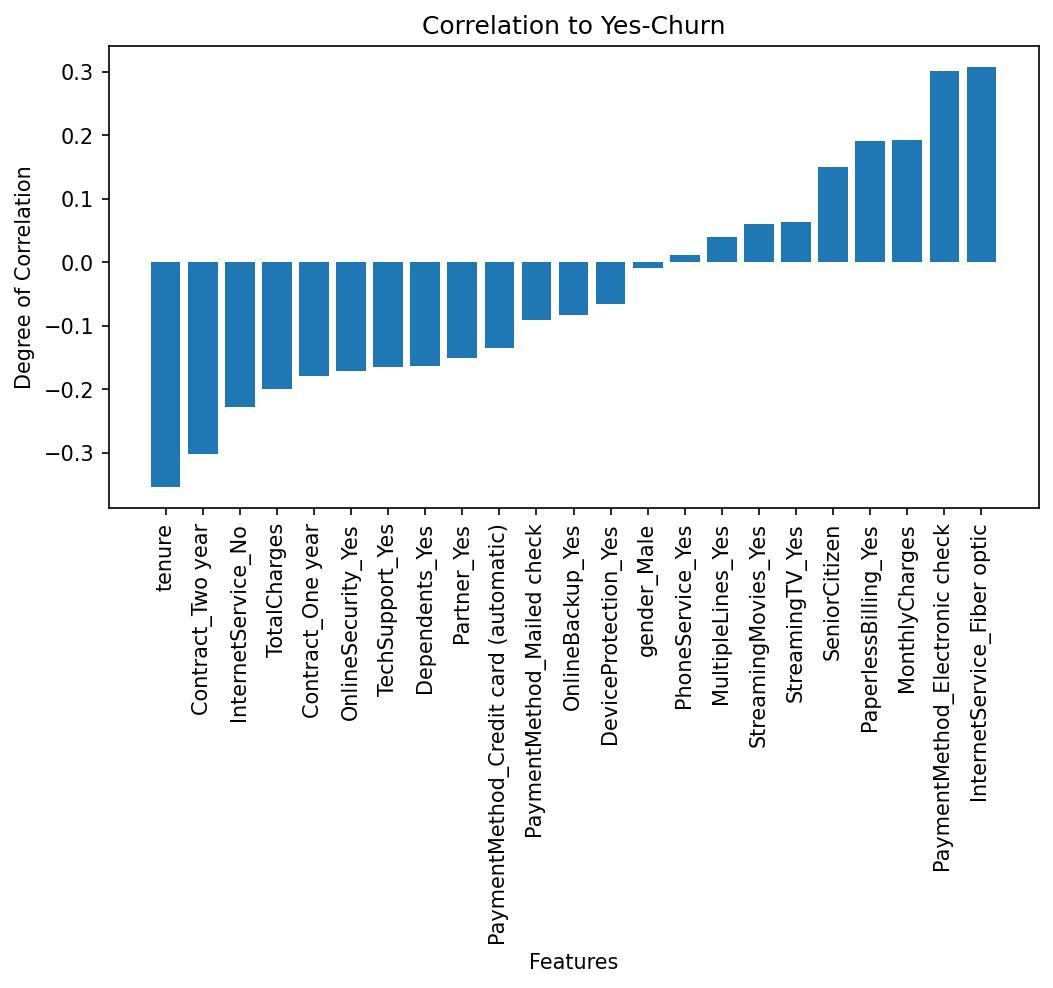

In [17]:
plt.figure(figsize=(8,4), dpi=150)
plt.bar(height=helper_series[:-1], x=helper_series.index[:-1])
plt.xlabel("Features")
plt.ylabel("Degree of Correlation")
plt.title("Correlation to Yes-Churn")
plt.xticks(rotation=90)
plt.show()

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [18]:
df["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

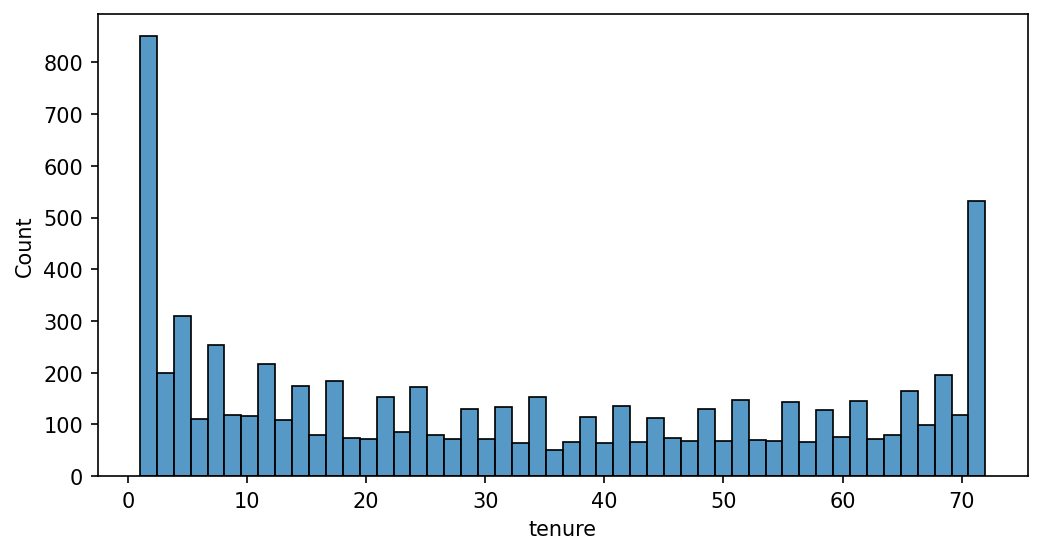

In [19]:
plt.figure(figsize=(8,4), dpi=150)
sns.histplot(data=df, x="tenure", bins=50)
plt.show()

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

<Figure size 1200x600 with 0 Axes>

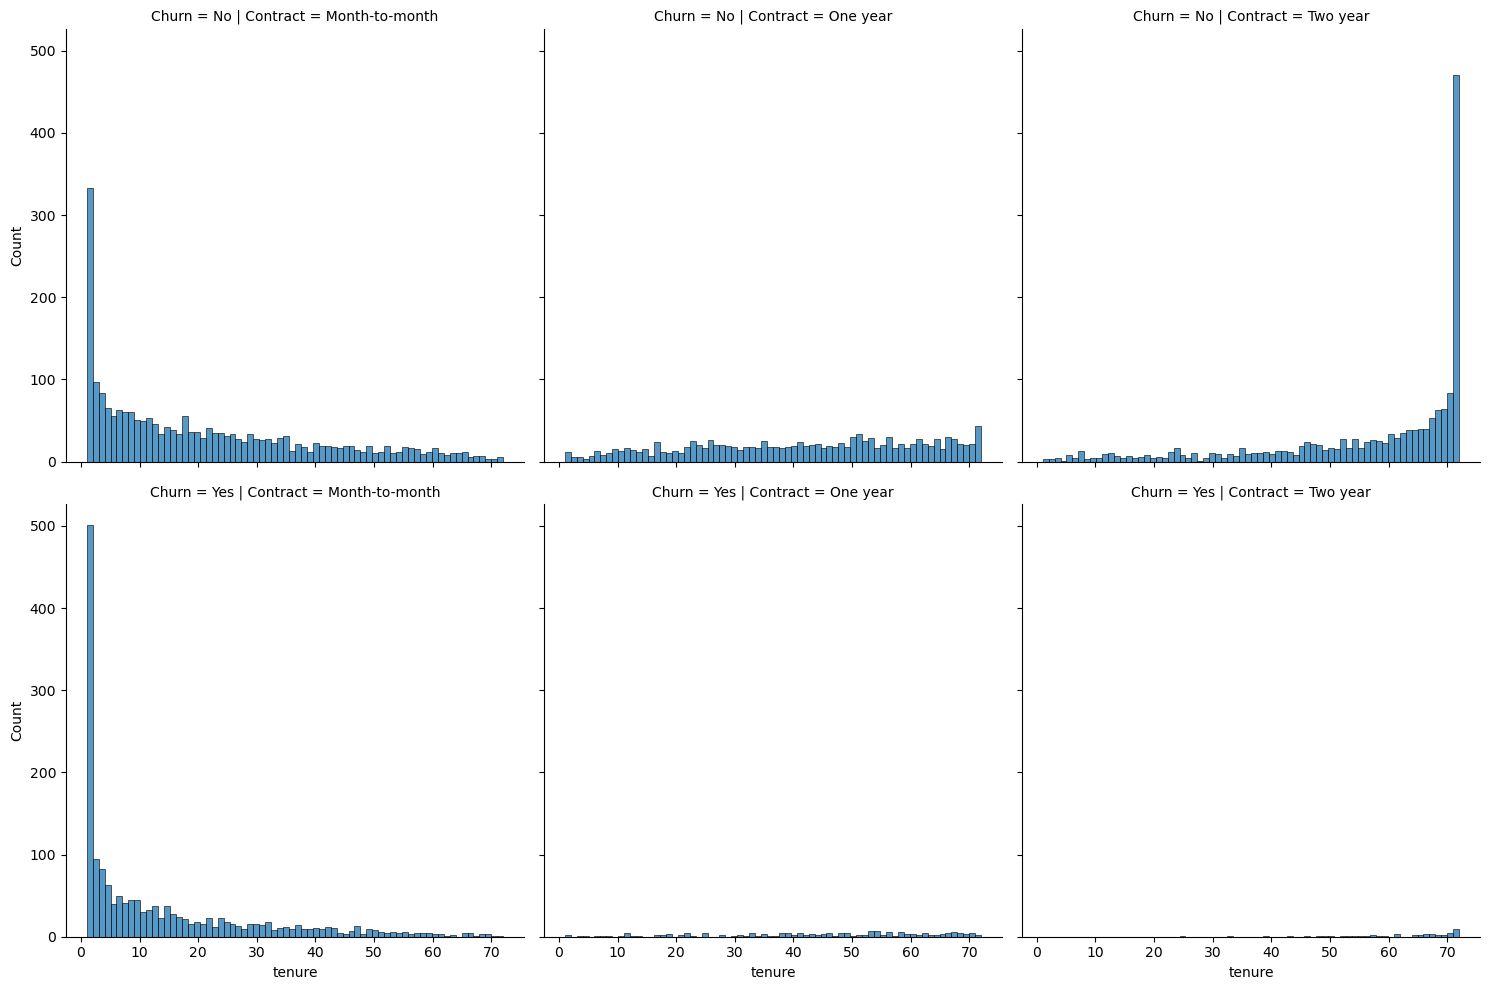

In [20]:
plt.figure(figsize=(8,4), dpi=150)
sns.displot(data=df, x='tenure', bins=70, col='Contract', row='Churn')
plt.show()

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

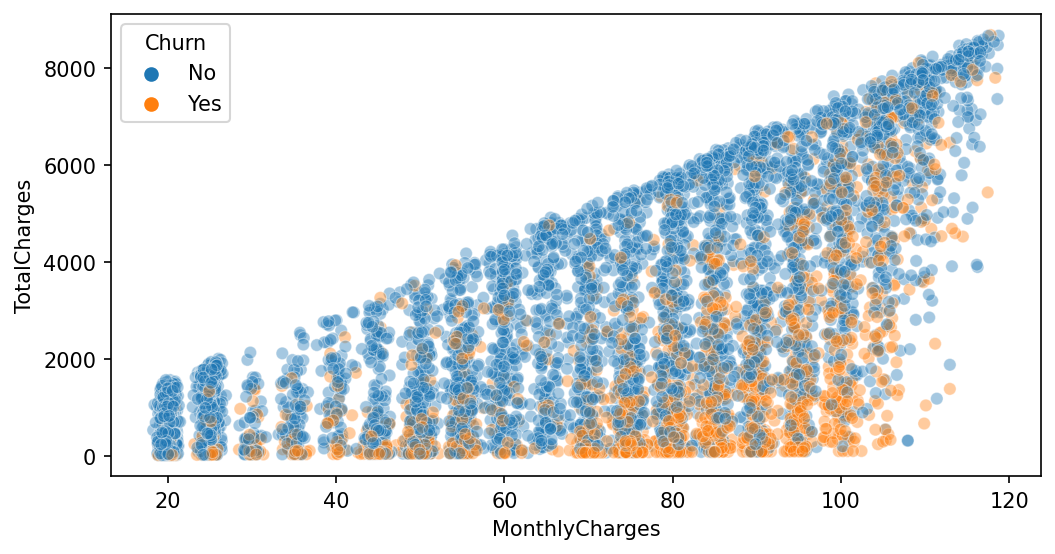

In [21]:
plt.figure(figsize=(8,4), dpi=150)
sns.scatterplot(data=df, y='TotalCharges', x="MonthlyCharges", hue="Churn", alpha=0.4)
plt.show()

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [22]:
df四 = df.copy()

cohorts = pandas.DataFrame(data=df四.groupby(by="tenure")["Churn"].value_counts())

In [23]:
cohorts = cohorts.rename(mapper={"Churn": "Count"}, axis=1)
cohorts = cohorts.sort_index(ascending=True)

In [24]:
cohorts

Count
tenure Churn       
1      No       233
       Yes      380
2      No       115
       Yes      123
3      No       106
...             ...
70     Yes       11
71     No       164
       Yes        6
72     No       356
       Yes        6

[144 rows x 1 columns]

In [25]:
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 144 entries, (1, 'No') to (72, 'Yes')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Count   144 non-null    int64
dtypes: int64(1)
memory usage: 2.1+ KB


In [26]:
cohorts.xs("Yes", level="Churn")

,Count
tenure,
1,380
2,123
3,94
4,83
5,64
...,...
68,9
69,8
70,11


In [27]:
total = cohorts.xs("Yes", level="Churn").values + cohorts.xs("No", level="Churn").values
total.shape

(72, 1)

In [28]:
total_array = numpy.array(list(zip(total, total))).reshape(144,)

In [29]:
cohorts["Churn Rate"] = 100 * cohorts["Count"] / total_array

In [30]:
cohorts

Count  Churn Rate
tenure Churn                   
1      No       233   38.009788
       Yes      380   61.990212
2      No       115   48.319328
       Yes      123   51.680672
3      No       106   53.000000
...             ...         ...
70     Yes       11    9.243697
71     No       164   96.470588
       Yes        6    3.529412
72     No       356   98.342541
       Yes        6    1.657459

[144 rows x 2 columns]

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [31]:
yes_rates = cohorts.xs("Yes", level="Churn")["Churn Rate"]

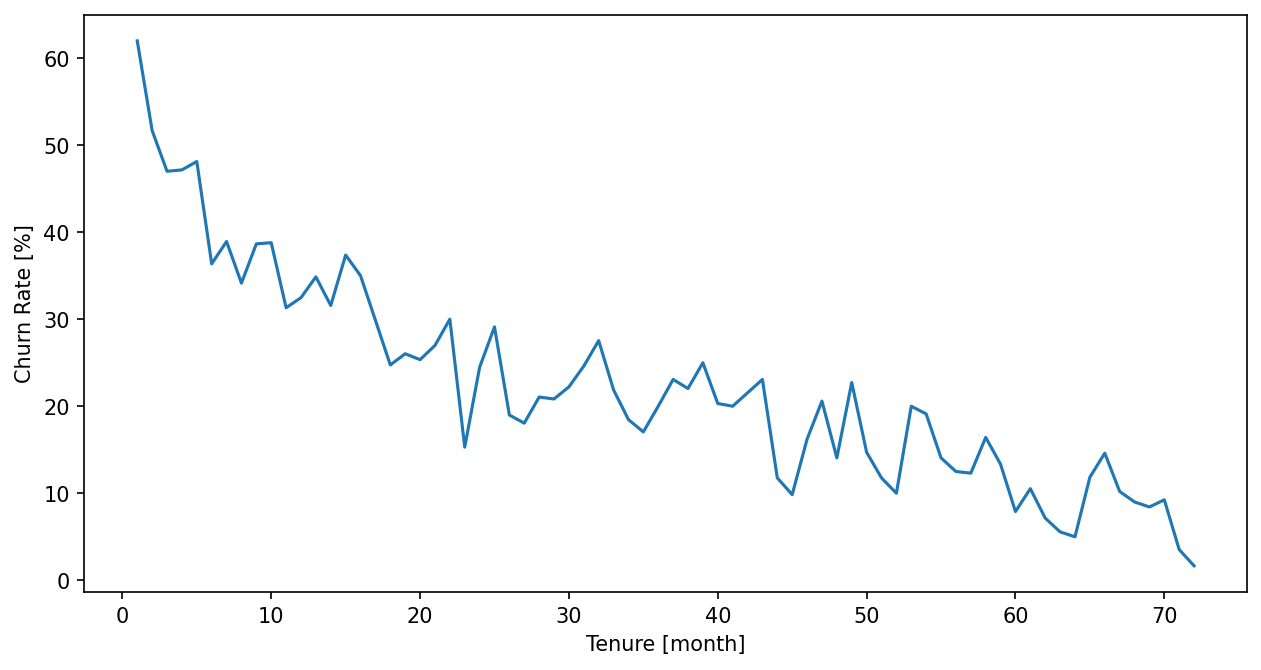

In [32]:
plt.figure(figsize=(10,5), dpi=150)
plt.plot(yes_rates.index, yes_rates)
plt.xlabel("Tenure [month]")
plt.ylabel("Churn Rate [%]")
plt.show()

<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [33]:
def cohort_helper(months: int):
    if 0 <= months <= 12:
        return "0-12 Months"
    elif 12 < months <= 24:
        return "12-24 Months"
    elif 24 < months <= 48:
        return "24-48 Months"
    else:
        return "Over 48 Months"

In [34]:
df四["Tenure Cohort"] = df四["tenure"].apply(func=cohort_helper)

In [35]:
df四["Tenure Cohort"].value_counts()

Over 48 Months    2239
0-12 Months       2175
24-48 Months      1594
12-24 Months      1024
Name: Tenure Cohort, dtype: int64

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [36]:
df四.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure Cohort'],
      dtype='object')

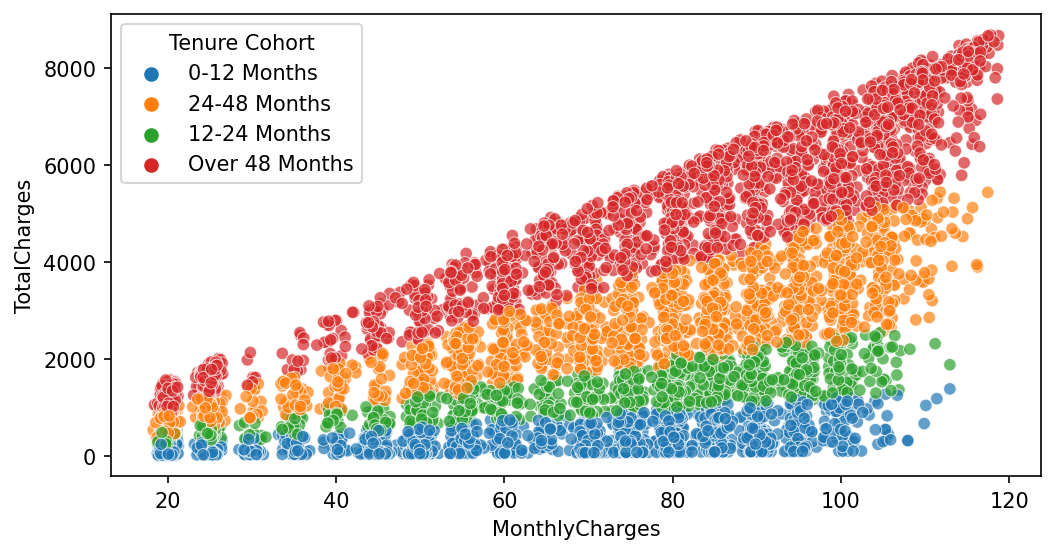

In [37]:
plt.figure(figsize=(8,4), dpi=150)
sns.scatterplot(data=df四, x="MonthlyCharges", y="TotalCharges", hue="Tenure Cohort", alpha=0.7)
plt.show()

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

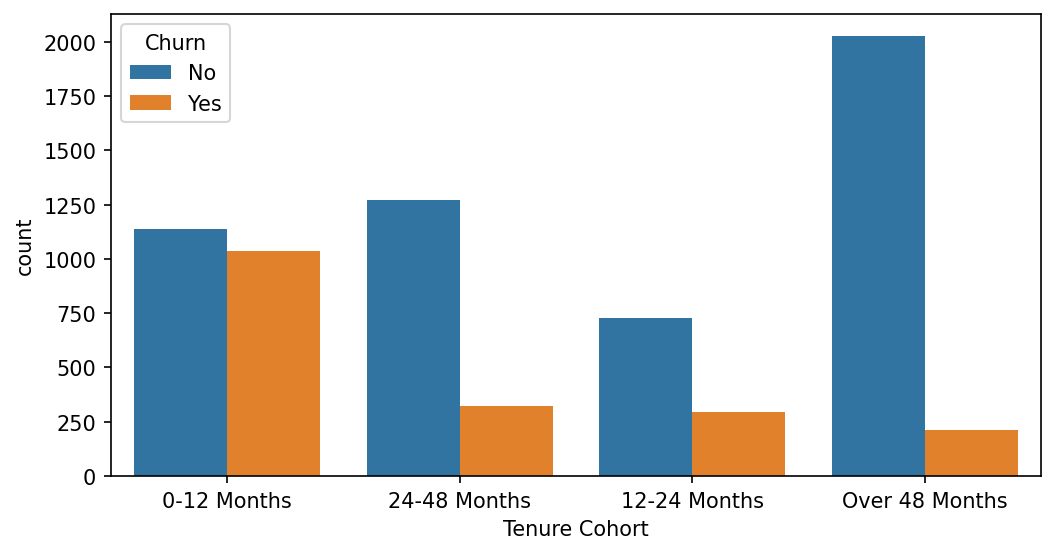

In [38]:
plt.figure(figsize=(8,4), dpi=150)
sns.countplot(data=df四, hue="Churn", x="Tenure Cohort")
plt.show()

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

<Figure size 1200x600 with 0 Axes>

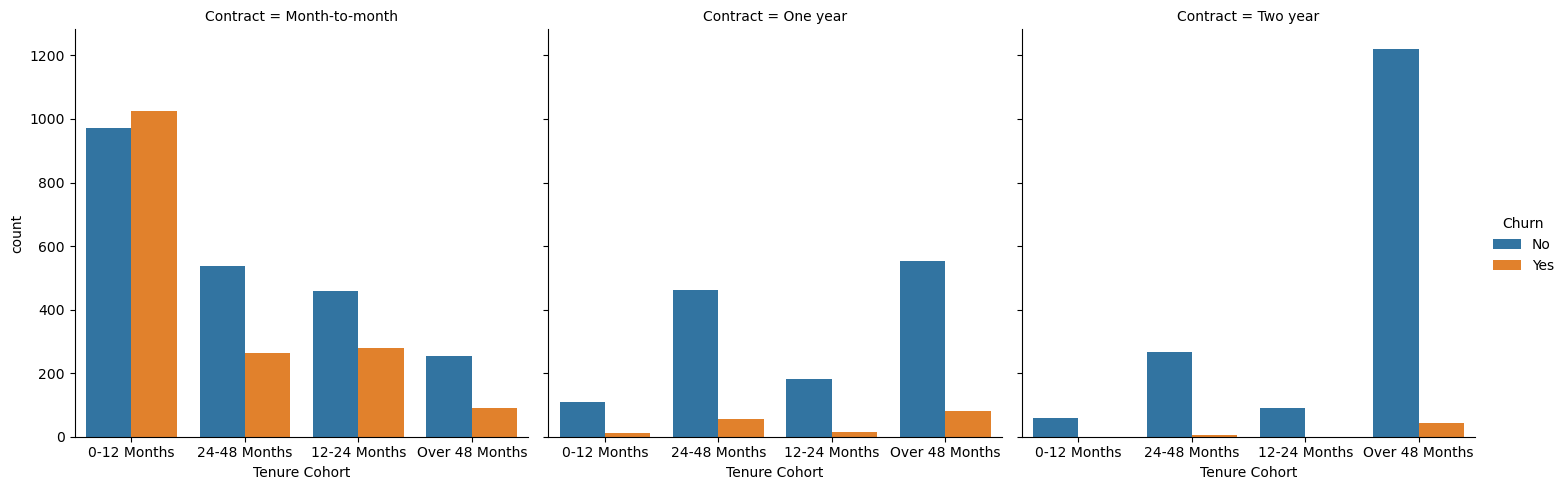

In [39]:
plt.figure(figsize=(8,4), dpi=150)
sns.catplot(data=df四, x='Tenure Cohort', hue='Churn', col='Contract', kind='count')
plt.show()

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [40]:
df三

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,...,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,1,0,...,1,1,1,1,0,1,0,0,1,0
7028,0,72,103.20,7362.90,0,1,1,1,1,1,...,0,1,1,1,0,1,1,0,0,0
7029,0,11,29.60,346.45,0,1,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7030,1,4,74.40,306.60,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,1,1


In [41]:
X = df三.drop(columns=["Churn_Yes"])
y = df三["Churn_Yes"].map({0: "No", 1: "Yes"})

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
datasets = dict()

datasets["x train"], datasets["x test"], datasets["y train"], datasets["y test"] = train_test_split(X, y, test_size=0.2, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [44]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier()

In [45]:
tree_model.fit(X=datasets["x train"],y=datasets["y train"])

DecisionTreeClassifier()

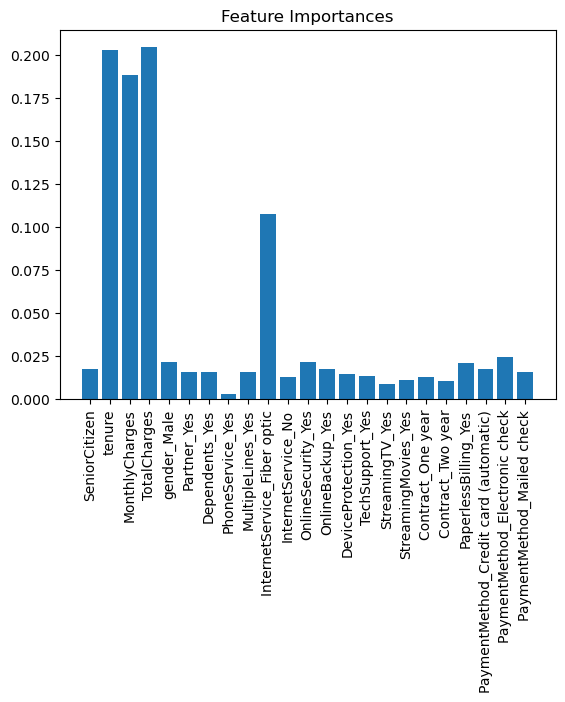

In [46]:
plt.bar(x=datasets["x train"].columns, height=tree_model.feature_importances_)
plt.title("Feature Importances")
plt.xticks(rotation=90)
plt.show()

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
datasets["y pred"] = tree_model.predict(X=datasets["x test"])

In [49]:
datasets["y test"].value_counts()

No     1052
Yes     355
Name: Churn_Yes, dtype: int64

In [50]:
confusion_matrix(y_true=datasets["y test"], y_pred=datasets["y pred"])

array([[821, 231],
       [155, 200]])

In [51]:
print(classification_report(y_true=datasets["y test"], y_pred=datasets["y pred"]))

              precision    recall  f1-score   support

          No       0.84      0.78      0.81      1052
         Yes       0.46      0.56      0.51       355

    accuracy                           0.73      1407
   macro avg       0.65      0.67      0.66      1407
weighted avg       0.75      0.73      0.73      1407



In [52]:
from sklearn.tree import plot_tree

In [53]:
# Slow process
def plot_my_tree():
    plt.figure(figsize=(12,10), dpi=120)
    plot_tree(decision_tree=tree_model, feature_names=datasets["x train"].columns);
    plt.show()

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [54]:
from sklearn.ensemble import RandomForestClassifier
forest_model = RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters = {"criterion": ["gini", "entropy", "log_loss"]}

grid_forest_model = GridSearchCV(estimator=forest_model, param_grid=parameters)

grid_forest_model.fit(X=datasets["x train"], y=datasets["y train"])

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [57]:
grid_forest_model.best_params_

{'criterion': 'log_loss'}

In [58]:
datasets["y pred"] = grid_forest_model.predict(X=datasets["x test"])

In [59]:
confusion_matrix(y_true=datasets["y test"], y_pred=datasets["y pred"])

array([[935, 117],
       [174, 181]])

In [60]:
print(classification_report(y_true=datasets["y test"], y_pred=datasets["y pred"]))

              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1052
         Yes       0.61      0.51      0.55       355

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.79      1407



## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [61]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [62]:
adaboost_model = AdaBoostClassifier(n_estimators=100)
gradboost_model = GradientBoostingClassifier()

In [63]:
parameters_ada = {"learning_rate": [0.5, 1.0, 2.0, 5.0]}
parameters_grad = {"learning_rate": [0.05, 0.1, 0.3, 0.5, 1.0],
                   "loss": ["log_loss", "exponential"],
                   "criterion": ["friedman_mse", "squared_error"]}

In [64]:
grid_ada_model = GridSearchCV(estimator=adaboost_model, param_grid=parameters_ada)
grid_ada_model.fit(X=datasets["x train"], y=datasets["y train"])

GridSearchCV(estimator=AdaBoostClassifier(n_estimators=100),
             param_grid={'learning_rate': [0.5, 1.0, 2.0, 5.0]})

In [65]:
grid_ada_model.best_params_

{'learning_rate': 0.5}

In [66]:
grid_grad_model = GridSearchCV(estimator=gradboost_model, param_grid=parameters_grad)
grid_grad_model.fit(X=datasets["x train"], y=datasets["y train"])

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.05, 0.1, 0.3, 0.5, 1.0],
                         'loss': ['log_loss', 'exponential']})

In [67]:
grid_grad_model.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'exponential'}

In [68]:
datasets["y pred ada"] = grid_ada_model.predict(X=datasets["x test"])
datasets["y pred grad"] = grid_grad_model.predict(X=datasets["x test"])

#### Adaboost

In [69]:
confusion_matrix(y_true=datasets["y test"], y_pred=datasets["y pred ada"])

array([[958,  94],
       [166, 189]])

In [70]:
print(classification_report(y_true=datasets["y test"], y_pred=datasets["y pred ada"]))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88      1052
         Yes       0.67      0.53      0.59       355

    accuracy                           0.82      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.81      0.82      0.81      1407



#### Gradientboost

In [71]:
confusion_matrix(y_true=datasets["y test"], y_pred=datasets["y pred grad"])

array([[951, 101],
       [168, 187]])

In [72]:
print(classification_report(y_true=datasets["y test"], y_pred=datasets["y pred grad"]))

              precision    recall  f1-score   support

          No       0.85      0.90      0.88      1052
         Yes       0.65      0.53      0.58       355

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



**TASK: Analyze your results, which model performed best for you?**

All models have an extremley low precision and recall score for the class label "Yes".

These models can accurately predict if a customer will not Churn, but they have too many false negatives for when the user might indeed be planning to Churn.

### Great job!